In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import numpy as np

time_points = np.linspace(0, 8*np.pi, 8000)

seq_length = 5
dataX = []
dataY = []
for i in range(0, len(time_points) - seq_length, 1):
    seq_in = np.sin(time_points)[i:i + seq_length]
    seq_out = np.cos(time_points)[i]
    dataX.append([seq_in])
    dataY.append(seq_out)

X = np.reshape(dataX, (len(dataX), seq_length, 1))
y = np.reshape(dataY, (len(dataY), 1))

The output for the LSTM is the output for all the hidden nodes on the final layer.

* hidden_size - the number of LSTM blocks per layer.
* input_size - the number of input features per time-step.
* num_layers - the number of hidden layers.

In total there are hidden_size * num_layers LSTM blocks.

The input dimensions are (seq_len, batch, input_size).

* seq_len - the number of time steps in each input stream.
* batch - the size of each batch of input sequences.

The hidden and cell dimensions are: `(num_layers, batch, hidden_size)`

In [3]:
import torch.nn as nn
from torch.autograd import Variable

In [4]:
batch_size = 1
sequence_length = 5
input_size = 1
hidden_size=1
num_layers = 1
rnn = nn.RNN(input_size=input_size, hidden_size=hidden_size,num_layers=num_layers)
input = Variable(torch.randn(sequence_length, batch_size, input_size))

state = Variable(torch.zeros(1, batch_size, hidden_size))
output, state = rnn(input, state)

NameError: name 'torch' is not defined

In [5]:
print(rnn)

RNN(1, 1)


In [6]:
model = Sequential()
model.add(LSTM(16, input_shape=(X.shape[1], X.shape[2])))


model.add(Dense(y.shape[1], activation='linear'))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X[:6000], y[:6000], epochs=200, batch_size=10, verbose=2, validation_split=0.3)

NameError: name 'Sequential' is not defined

In [7]:
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.autograd import Variable
from torch import optim
import numpy as np
import math, random

# Generating a noisy multi-sin wave 

def sine_2(X, signal_freq=60.):
    return (np.sin(2 * np.pi * (X) / signal_freq) + np.sin(4 * np.pi * (X) / signal_freq)) / 2.0

def noisy(Y, noise_range=(-0.05, 0.05)):
    noise = np.random.uniform(noise_range[0], noise_range[1], size=Y.shape)
    return Y + noise

def sample(sample_size):
    random_offset = random.randint(0, sample_size)
    X = np.arange(sample_size)
    Y = noisy(sine_2(X + random_offset))
    return Y

# Define the model

class SimpleRNN(nn.Module):
    def __init__(self, hidden_size):
        super(SimpleRNN, self).__init__()
        self.hidden_size = hidden_size

        self.inp = nn.Linear(1, hidden_size)
        self.rnn = nn.LSTM(hidden_size, hidden_size, , dropout=0.05)
        self.out = nn.Linear(hidden_size, 1)

    def step(self, input, hidden=None):
        input = self.inp(input.view(1, -1)).unsqueeze(1)
        output, hidden = self.rnn(input, hidden)
        output = self.out(output.squeeze(1))
        return output, hidden

    def forward(self, inputs, hidden=None, force=True, steps=0):
        if force or steps == 0: steps = len(inputs)
        outputs = Variable(torch.zeros(steps, 1, 1))
        for i in range(steps):
            if force or i == 0:
                input = inputs[i]
            else:
                input = output
            output, hidden = self.step(input, hidden)
            outputs[i] = output
        return outputs, hidden

n_epochs = 10
n_iters = 50
hidden_size = 10

model = SimpleRNN(hidden_size)
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

losses = np.zeros(n_epochs) # For plotting

In [8]:
model

SimpleRNN (
  (inp): Linear (1 -> 10)
  (rnn): LSTM(10, 10, num_layers=2, dropout=0.05)
  (out): Linear (10 -> 1)
)

In [9]:
for epoch in range(10):

    for iter in range(n_iters):
        _inputs = sample(50)
        inputs = Variable(torch.from_numpy(_inputs[:-1]).float())
        targets = Variable(torch.from_numpy(_inputs[1:]).float())

        # Use teacher forcing 50% of the time
        force = random.random() < 0.5
        outputs, hidden = model(inputs, None, force)

        optimizer.zero_grad()
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        losses[epoch] += loss.data[0]

    if epoch > 0:
        print(epoch, loss.data[0])


1 0.276461124420166
2 0.26845911145210266
3 0.30500611662864685
4 0.253581702709198
5 0.2075287103652954
6 0.1637870967388153
7 0.17324179410934448
8 0.22156593203544617
9 0.3073495030403137


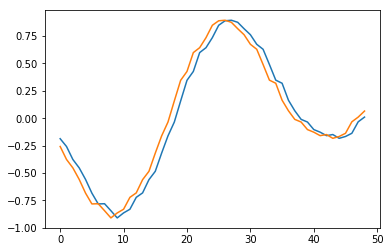

In [12]:
plt.plot(_inputs[:-1])
plt.plot(_inputs[1:])

In [13]:
_inputs.shape

(50,)

In [16]:
model.forward(torch.from_numpy(_inputs[:-1]))

AttributeError: 'float' object has no attribute 'view'

In [17]:
import numpy as np

from attention_utils import get_activations, get_data

np.random.seed(1337)  # for reproducibility
from keras.models import *
from keras.layers import Input, Dense, merge

input_dim = 32


def build_model():
    inputs = Input(shape=(input_dim,))

    # ATTENTION PART STARTS HERE
    attention_probs = Dense(input_dim, activation='softmax', name='attention_vec')(inputs)
    attention_mul = merge([inputs, attention_probs], output_shape=32, name='attention_mul', mode='mul')
    # ATTENTION PART FINISHES HERE

    attention_mul = Dense(64)(attention_mul)
    output = Dense(1, activation='sigmoid')(attention_mul)
    model = Model(input=[inputs], output=output)
    return model


ModuleNotFoundError: No module named 'attention_utils'

In [18]:
import torch
from torch import nn
from torch.autograd import Variable
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [19]:
# Hyper Parameters
TIME_STEP = 10      # rnn time step
INPUT_SIZE = 1      # rnn input size
LR = 0.02           # learning rate

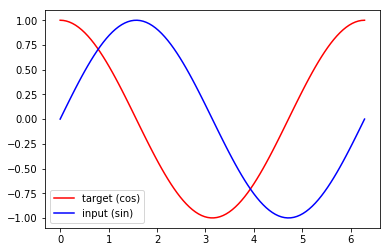

In [20]:
# show data
steps = np.linspace(0, np.pi*2, 100, dtype=np.float32)
x_np = np.sin(steps)    # float32 for converting torch FloatTensor
y_np = np.cos(steps)
plt.plot(steps, y_np, 'r-', label='target (cos)')
plt.plot(steps, x_np, 'b-', label='input (sin)')
plt.legend(loc='best')
plt.show()

In [27]:
class RNN(nn.Module):
    def __init__(self):
        super(RNN, self).__init__()

        self.rnn = nn.RNN(
            input_size=INPUT_SIZE,
            hidden_size=32,     # rnn hidden unit
            num_layers=2,       # number of rnn layer
            batch_first=True,   # input & output will has batch size as 1s dimension. e.g. (batch, time_step, input_size)
        )
        self.out = nn.Linear(32, 1)

    def forward(self, x, h_state):
        # x (batch, time_step, input_size)
        # h_state (n_layers, batch, hidden_size)
        # r_out (batch, time_step, hidden_size)
        r_out, h_state = self.rnn(x, h_state)

        outs = []    # save all predictions
        for time_step in range(r_out.size(1)):    # calculate output for each time step
            outs.append(self.out(r_out[:, time_step, :]))
        return torch.stack(outs, dim=1), h_state

In [28]:
rnn = RNN()
print(rnn)

RNN (
  (rnn): RNN(1, 32, num_layers=2, batch_first=True)
  (out): Linear (32 -> 1)
)


In [29]:
optimizer = torch.optim.Adam(rnn.parameters(), lr=LR)   # optimize all cnn parameters
loss_func = nn.MSELoss()

In [30]:
h_state = None      # for initial hidden state


In [31]:
plt.figure(1, figsize=(12, 5))
plt.ion()           # continuously plot

0 0.00599415
1 0.0112232
2 0.00619961
3 0.00932925
4 0.00304739
5 0.00491575
6 0.00270401
7 0.00276969
8 0.00503197
9 0.00395741
10 0.00688842
11 0.00153297
12 0.00224526
13 0.0202906
14 0.00430651
15 0.0617749
16 0.0387025
17 0.0331252
18 0.0728688
19 0.0442319
20 0.10201
21 0.0185066
22 0.0346384
23 0.0413085
24 0.392024
25 0.066708
26 0.217584
27 0.023089
28 0.00484282
29 0.0013223
30 0.14085
31 0.00569703
32 0.0143744
33 0.0657551
34 0.0693329
35 0.0394582
36 0.0609511
37 0.0383814
38 0.0422433
39 0.0494022
40 0.0242193
41 0.020213
42 0.00878812
43 0.00421544
44 0.01952
45 0.0140895
46 0.0247598
47 0.0228013
48 0.0247751
49 0.0137903
50 0.00447587
51 0.00776905
52 0.00396916
53 0.00457202
54 0.00384026
55 0.00213248
56 0.00663612
57 0.00576715
58 0.00479288
59 0.00473789
60 0.0113495
61 0.00956238
62 0.0117414
63 0.0028613
64 0.00185486
65 0.00542461
66 0.00343881
67 0.00492301
68 0.00164521
69 0.0019127
70 0.00329816
71 0.00310071
72 0.00280437
73 0.00175256
74 0.000831469
75 0.00

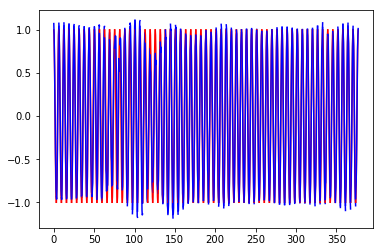

In [38]:
for step in range(120):
    start, end = step * np.pi, (step+1)*np.pi   # time range
    # use sin predicts cos
    steps = np.linspace(start, end, TIME_STEP, dtype=np.float32)
    x_np = np.sin(steps)    # float32 for converting torch FloatTensor
    y_np = np.cos(steps)

    x = Variable(torch.from_numpy(x_np[np.newaxis, :, np.newaxis]))    # shape (batch, time_step, input_size)
    y = Variable(torch.from_numpy(y_np[np.newaxis, :, np.newaxis]))

    prediction, h_state = rnn(x, h_state)   # rnn output
    # !! next step is important !!
    h_state = Variable(h_state.data)        # repack the hidden state, break the connection from last iteration

    loss = loss_func(prediction, y)         # cross entropy loss
    print(step, loss.data.numpy()[0])
    optimizer.zero_grad()                   # clear gradients for this training step
    loss.backward()                         # backpropagation, compute gradients
    optimizer.step()                        # apply gradients
    
    plt.plot(steps, y_np.flatten(), 'r-')
    plt.plot(steps, prediction.data.numpy().flatten(), 'b-')
    plt.draw(); plt.pause(0.1)

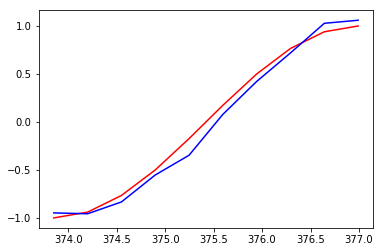

In [37]:
    # plotting


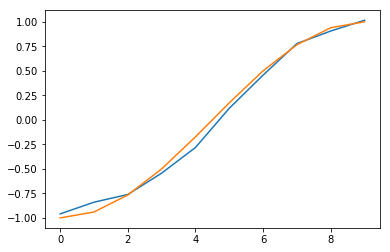

In [45]:
plt.plot(prediction.data.numpy().flatten())
plt.plot(y_np)

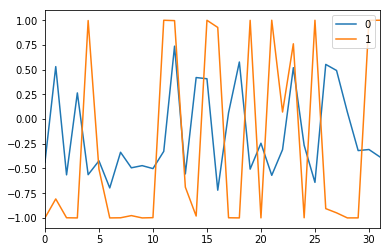

In [53]:
pd.DataFrame(h_state.data.numpy().reshape(2, 32)).T.plot()